In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import umap

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [146]:
df_in = pd.read_csv('df_clustering.csv')

In [147]:
pd.set_option('display.max_columns', None) 
df_in.head() 

,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,92131,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.000000,0.000000,1,0.0,60,90,within a few hours,100.0,0.0,1.0,1.0,0.0,0,0,96.500000,9.725000,9.700000,9.850000,9.750000,9.750000,9.775000,0,1,0,strict_14_with_grace_period,0,0
1,92037,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,722.168919,219.822930,1,0.0,30,1125,NaN,0.0,0.0,1.0,1.0,0.0,2,4,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0
2,92109,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,372.402174,123.162459,1,0.0,30,30,NaN,0.0,0.0,1.0,1.0,0.0,0,0,95.406423,9.730599,9.493348,9.853496,9.834812,9.875694,9.457778,0,1,0,flexible,0,0
3,92120,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,227.731959,58.066038,1,0.0,31,40,NaN,0.0,0.0,1.0,1.0,0.0,0,0,96.090909,9.747475,9.545455,9.867347,9.848485,9.765306,9.673469,0,0,0,flexible,0,0
4,92037,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",110.0,110.0,200.000000,219.822930,1,50.0,180,365,within a day,67.0,0.0,6.0,1.0,1.0,2,4,90.000000,7.000000,7.000000,8.000000,8.000000,9.000000,10.000000,0,0,0,strict_14_with_grace_period,0,0


In [148]:
mode_value = df_in['host_response_time'].mode()[0]

df_in['host_response_time'].fillna(mode_value, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32540\4108404366.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_in['host_response_time'].fillna(mode_value, inplace=True)


In [149]:
df_in = df_in.dropna()

In [150]:
df = df_in.copy()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13030 entries, 0 to 13050
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   zipcode                           13030 non-null  int64  
 1   property_type                     13030 non-null  object 
 2   room_type                         13030 non-null  object 
 3   accommodates                      13030 non-null  int64  
 4   bathrooms                         13030 non-null  float64
 5   bedrooms                          13030 non-null  float64
 6   beds                              13030 non-null  float64
 7   bed_type                          13030 non-null  object 
 8   amenities                         13030 non-null  object 
 9   nightly_price                     13030 non-null  float64
 10  price_per_stay                    13030 non-null  float64
 11  security_deposit                  13030 non-null  float64
 12  cleaning_

In [152]:
import pandas as pd

df['amenities'] = df['amenities'].str.replace('[{}"\']', '', regex=True)
amenity_dummies = df['amenities'].str.get_dummies(sep=',')
df = pd.concat([df, amenity_dummies], axis=1)
df = df.drop('amenities', axis=1)
df.head(3)

,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Alfresco shower,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast bar,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling fans,Central air conditioning,Changing table,Chefs kitchen,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Dining area,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,Dual vanity,EV charger,Electric profiling bed,Elevator,En suite bathroom,Espresso machine,Essentials,Ethernet connection,Exercise equipment,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fax machine,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Garage parking,Garden or backyard,Gas grill,Gas oven,Ground floor access,Gym,HBO GO,Hair dryer,Hammock,Hand or paper towel,Handheld shower head,Hangers,Heat lamps,Heated floors,Heated towel rack,Heating,High chair,High-resolution computer monitor,Host greets you,Hot tub,Hot water,Hot water kettle,Ice Machine,Indoor fireplace,Internet,Iron,Ironing Board,Jetted tub,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Lounge chairs,Luggage dropoff allowed,Memory foam mattress,Microwave,Mini fridge,Mountain view,Murphy bed,Natural gas barbeque,Netflix,No stairs or steps to enter,Other,Other pet(s),Outdoor kitchen,Outdoor parking,Outdoor seating,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Parking,Patio,Patio or balcony,Permit parking,Pets allowed,Pets live on this property,Pillow-top mattress,Pocket wifi,Pool,Pool toys,Pool with pool hoist,Portable air conditioning,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Private pool,Projector and screen,Rain shower,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Sauna,Security cameras,Self check-in,Shampoo,Shared gym,Shared hot tub,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Stove,Suitable for events,Sun deck,Sun loungers,TV,Table corner guards,Tennis court,Terrace,Toaster,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,92131,House,Private room,1,1.0,1.0,1.0,Real Bed,1100.0,1100.0,1000.000000,0.000000,1,0.0,60,90,within a few hours,100.0,0.0,1.0,1.0,0.0,0,0,96.500000,9.725000,9.700

In [153]:
import pandas as pd

categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.append('zipcode')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int) 

df_encoded.head()

,accommodates,bathrooms,bedrooms,beds,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Alfresco shower,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast bar,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling fans,Central air conditioning,Changing table,Chefs kitchen,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Dining area,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,Dual vanity,EV charger,Electric profiling bed,Elevator,En suite bathroom,Espresso machine,Essentials,Ethernet connection,Exercise equipment,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fax machine,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Garage parking,Garden or backyard,Gas grill,Gas oven,Ground floor access,Gym,HBO GO,Hair dryer,Hammock,Hand or paper towel,Handheld shower head,Hangers,Heat lamps,Heated floors,Heated towel rack,Heating,High chair,High-resolution computer monitor,Host greets you,Hot tub,Hot water,Hot water kettle,Ice Machine,Indoor fireplace,Internet,Iron,Ironing Board,Jetted tub,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Lounge chairs,Luggage dropoff allowed,Memory foam mattress,Microwave,Mini fridge,Mountain view,Murphy bed,Natural gas barbeque,Netflix,No stairs or steps to enter,Other,Other pet(s),Outdoor kitchen,Outdoor parking,Outdoor seating,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Parking,Patio,Patio or balcony,Permit parking,Pets allowed,Pets live on this property,Pillow-top mattress,Pocket wifi,Pool,Pool toys,Pool with pool hoist,Portable air conditioning,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Private pool,Projector and screen,Rain shower,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Sauna,Security cameras,Self check-in,Shampoo,Shared gym,Shared hot tub,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Stove,Suitable for events,Sun deck,Sun loungers,TV,Table corner guards,Tennis court,Terrace,Toaster,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type

In [154]:
scaler = MinMaxScaler()

columns_to_scale = df_encoded.columns 
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[columns_to_scale]), columns=columns_to_scale)

df_scaled.head()

,accommodates,bathrooms,bedrooms,beds,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Alfresco shower,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Balcony,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Body soap,Breakfast,Breakfast bar,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Ceiling fans,Central air conditioning,Changing table,Chefs kitchen,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Dining area,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,Dual vanity,EV charger,Electric profiling bed,Elevator,En suite bathroom,Espresso machine,Essentials,Ethernet connection,Exercise equipment,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fax machine,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Garage parking,Garden or backyard,Gas grill,Gas oven,Ground floor access,Gym,HBO GO,Hair dryer,Hammock,Hand or paper towel,Handheld shower head,Hangers,Heat lamps,Heated floors,Heated towel rack,Heating,High chair,High-resolution computer monitor,Host greets you,Hot tub,Hot water,Hot water kettle,Ice Machine,Indoor fireplace,Internet,Iron,Ironing Board,Jetted tub,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Lounge chairs,Luggage dropoff allowed,Memory foam mattress,Microwave,Mini fridge,Mountain view,Murphy bed,Natural gas barbeque,Netflix,No stairs or steps to enter,Other,Other pet(s),Outdoor kitchen,Outdoor parking,Outdoor seating,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Parking,Patio,Patio or balcony,Permit parking,Pets allowed,Pets live on this property,Pillow-top mattress,Pocket wifi,Pool,Pool toys,Pool with pool hoist,Portable air conditioning,Printer,Private bathroom,Private entrance,Private hot tub,Private living room,Private pool,Projector and screen,Rain shower,Refrigerator,Roll-in shower,Room-darkening shades,Safety card,Sauna,Security cameras,Self check-in,Shampoo,Shared gym,Shared hot tub,Shared pool,Shower chair,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Stove,Suitable for events,Sun deck,Sun loungers,TV,Table corner guards,Tennis court,Terrace,Toaster,Toilet paper,Touchless faucets,Walk-in shower,Warming drawer,Washer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type

In [155]:
df_scaled.shape

(13030, 355)

In [156]:
embedding = umap.UMAP(n_neighbors=500, min_dist= .8).fit_transform(df_scaled)

In [157]:
np.save('embedding_plot.npy', embedding)

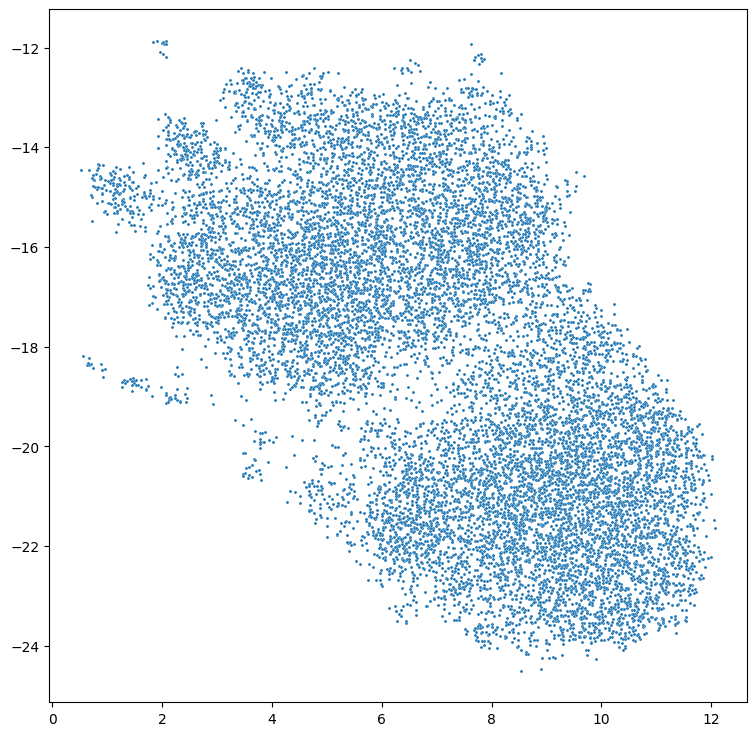

In [158]:
embedding = np.load('embedding_plot.npy')

fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], s=5, alpha=1)
plt.show()

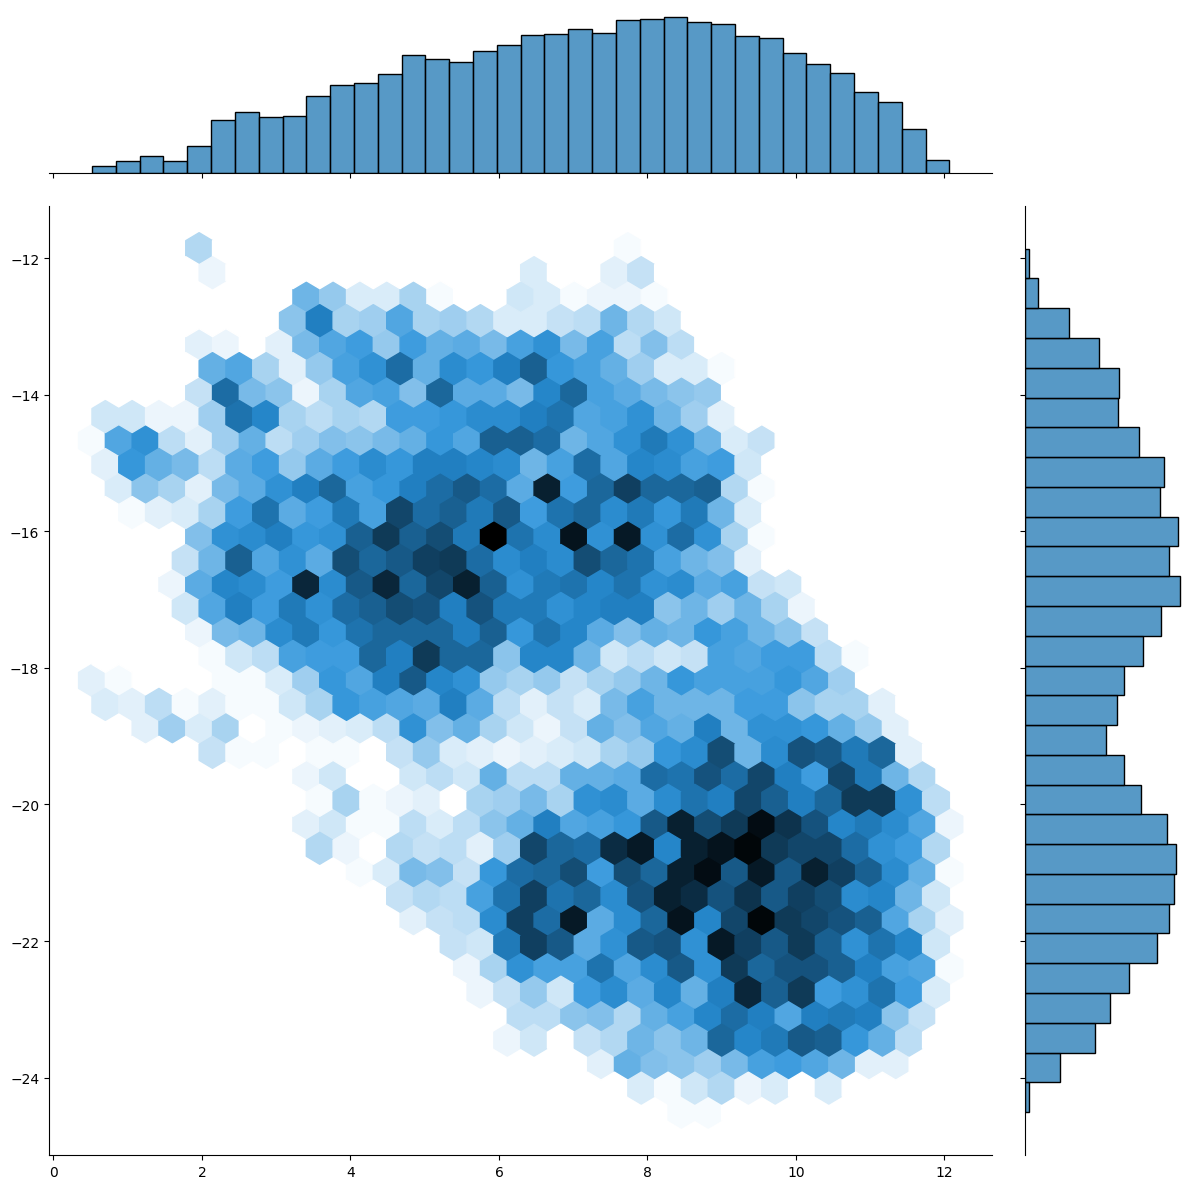

In [159]:
embedding = np.load('embedding_plot.npy')

sns.jointplot(x=embedding[:, 0], y=embedding[:, 1], kind='hex', height=12)
plt.show()

In [160]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [161]:
results=[]
kmeans_predictions = []

for k in range(2, 10):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(df_scaled)
    predict = kmeans.predict(df_scaled)
    result = {
        'k':k,
        'inertia': kmeans.inertia_,                      
        'silhouette': silhouette_score(df_scaled, predict), 
    }
    results.append(result)
    kmeans_predictions.append(predict)
    print(result, end='\r')
    
cluster_results = pd.DataFrame(results)

In [162]:
cluster_results.to_csv('cluster_results')

In [163]:
cluster_results = pd.read_csv('cluster_results', index_col= 0)

clusters = 5

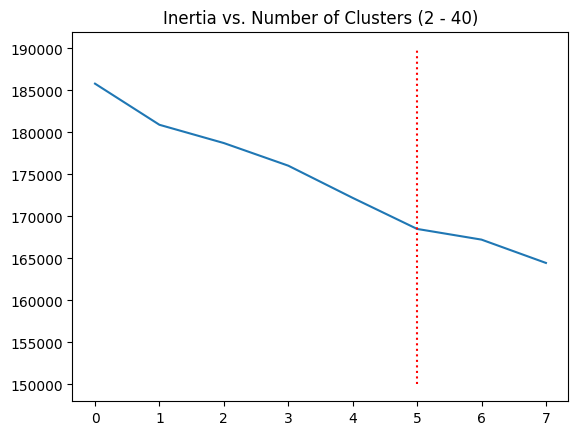

In [164]:
fig, ax = plt.subplots()
ax.set_title('Inertia vs. Number of Clusters (2 - 40)')
cluster_results.inertia.plot(ax=ax)
ax.vlines(x=clusters, ymin=150000, ymax=190000, colors='red', linestyles='dotted')
plt.show()

In [165]:
kmeans = MiniBatchKMeans(n_clusters = clusters, random_state = 42).fit(df_scaled)
kmeans

,n_clusters,5
,init,'k-means++'
,max_iter,100
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,42
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [166]:
pred_labels = np.unique(kmeans.predict(df_scaled))
pred_labels

array([0, 1, 2, 3, 4])

In [167]:
cluster_labels = pd.Series(kmeans.predict(df_scaled), index = df_scaled.index)

# convert predicted cluster labels to a list
cluster_list = cluster_labels.values.tolist()

In [168]:
df_post_clustering = df_in.copy()
df_post_clustering.insert(1, 'cluster_label', cluster_list)

df_post_clustering.head()

,zipcode,cluster_label,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,92131,1,House,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",1100.0,1100.0,1000.000000,0.000000,1,0.0,60,90,within a few hours,100.0,0.0,1.0,1.0,0.0,0,0,96.500000,9.725000,9.700000,9.850000,9.750000,9.750000,9.775000,0,1,0,strict_14_with_grace_period,0,0
1,92037,3,Apartment,Entire home/apt,1,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",1400.0,1400.0,722.168919,219.822930,1,0.0,30,1125,within an hour,0.0,0.0,1.0,1.0,0.0,2,4,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,0,strict_14_with_grace_period,0,0
2,92109,1,Townhouse,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",1250.0,1250.0,372.402174,123.162459,1,0.0,30,30,within an hour,0.0,0.0,1.0,1.0,0.0,0,0,95.406423,9.730599,9.493348,9.853496,9.834812,9.875694,9.457778,0,1,0,flexible,0,0
3,92120,1,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Pool,Kitchen,""Free pa...",1150.0,1150.0,227.731959,58.066038,1,0.0,31,40,within an hour,0.0,0.0,1.0,1.0,0.0,0,0,96.090909,9.747475,9.545455,9.867347,9.848485,9.765306,9.673469,0,0,0,flexible,0,0
4,92037,1,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",110.0,110.0,200.000000,219.822930,1,50.0,180,365,within a day,67.0,0.0,6.0,1.0,1.0,2,4,90.000000,7.000000,7.000000,8.000000,8.000000,9.000000,10.000000,0,0,0,strict_14_with_grace_period,0,0


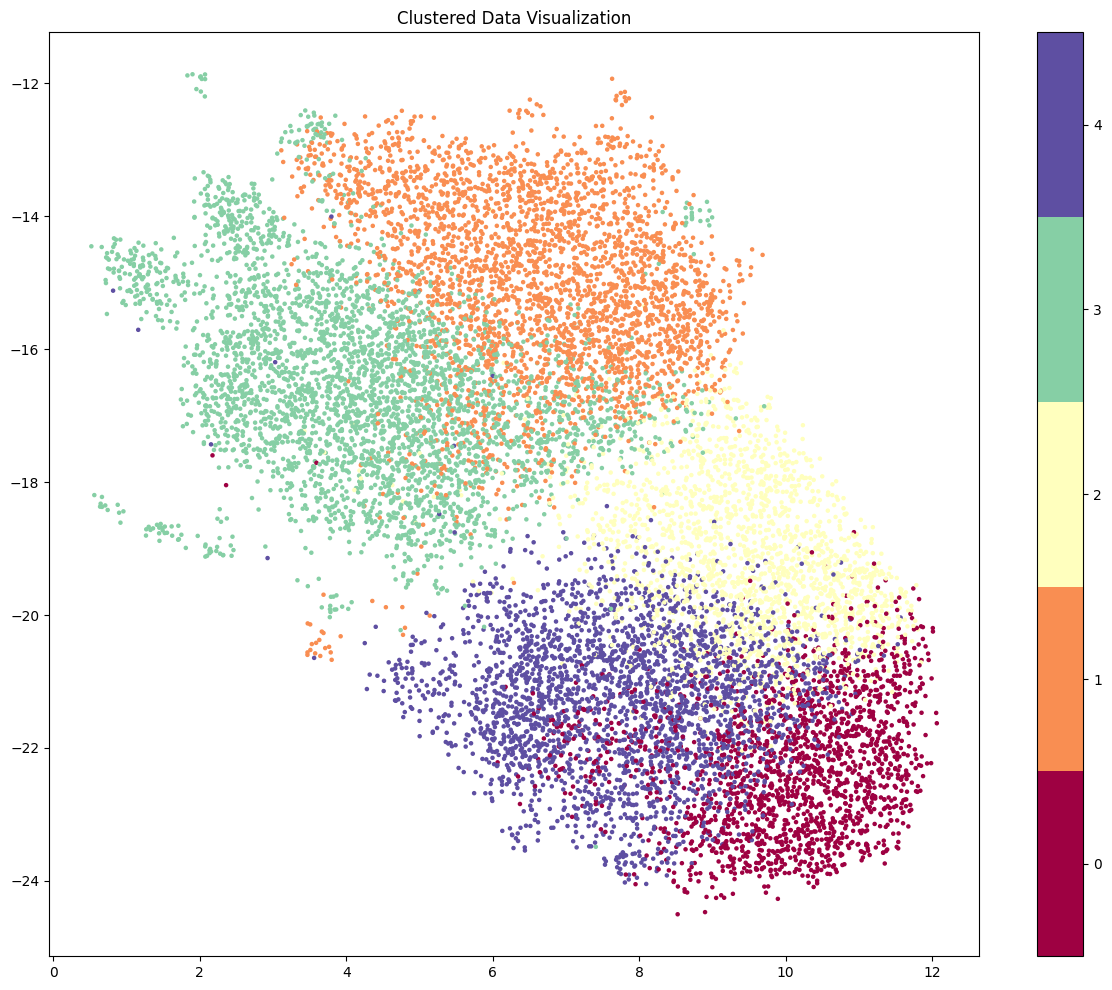

In [171]:
fig, ax = plt.subplots(figsize = (15,12))

plt.scatter(*embedding.T, s = 5, alpha = 1, c = kmeans.predict(df_scaled), cmap = 'Spectral')

labels = sorted(list(cluster_labels.unique())) 

cbar = plt.colorbar(boundaries=np.arange(6)-0.5)
cbar.set_ticks(np.arange(5))
cbar.set_ticklabels(labels)
plt.title('Clustered Data Visualization');

plt.show()

In [172]:
df_post_clustering.to_csv('df_post_clustering.csv', index=False)